# Exploratory Data Analysis: Algerian Forest Fire 

By- Abhijeet Srivastav

- [LinkedIn](https://www.linkedin.com/in/abhijeet-srivastav-02245a18b/)
- [Github](https://github.com/AbhijeetSrivastav/Data-Science-Guide)
- [Social](https://www.instagram.com/abhijeet.codes/)

**Objectives of EDA**
1. Discover Patterns
2. Spot Anomalies
3. Frame Hypothesis
4. Check Assumptions

**Methods for exploration**
1. Univariate Analysis
2. Bivariate Analysis

**Stuff done during EDA**
1. Trends
2. Distribution
3. Mean
4. Median
5. Outlier
6. Spread measurement (SD)
7. Correlations
8. Hypothesis testing
9. Visual Exploration

**Data Set Information**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.
- The period from June 2012 to September 2012.
- The dataset includes 11 attribues and 1 output attribue (class)
- The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.



**Attribute Information**
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

## 0. Required Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats

In [3]:
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Problem Statement

Predict the forest fire based on different features

## 2. Data Collection

In [4]:
df = pd.read_csv('../Data/Algerian_forest_fires_dataset.csv', header=1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## 3. Data Preprocessing

In [6]:
df.shape

(246, 14)

So we have 246 rows and 14 columns

### 3.1 Dropping rows with no use

We can observe:

In [7]:
df.iloc[122]  # Sidi-Bel region name 

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [8]:
df.iloc[123]  # column head for Sidi- Bel region name

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

Now we will drop these irrelevant rows

In [9]:
df.drop(index=[122, 123], inplace=True)
df.reset_index(inplace=True)

Dropping the index column

In [10]:
df.drop('index', axis=1, inplace=True)

### 3.2 Adding Region feature

We have dataset of two regions:
- Bejaia Region Dataset
- Sidi-Bel Abbes Region Dataset

within a single sheet. So we will create a new column named 'Region' and set value of each row specific to that region.

Values for regions are:
- Sidi-Bel = 1
- Bejal = 0

Sidi-Bel region data begins from 122 to last including 122 and data for Bejai region begin from start to 122 excluding 122.

In [11]:
# accessing rows from start to 122 and creating a column region and setting its values to 0
df.loc[:122, 'Region'] = 0 

In [12]:
# accessing rows from 122 to end and creating a column region and setting its values to 1
df.loc[122:, 'Region'] = 1

### 3.3 Removing spaces from columns

Remove space from the column heads

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Their are spaces in column names so we need to remove them

In [14]:
df.columns = [col_name.strip() for col_name in df.columns]

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Remove space from the columns. But for that we need to convert all the columns to string first.

In [16]:
df = df.astype(str)

In [17]:
for column in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[column]= df[column].str.replace(" ","")

### 3.4 Removing missing or wrong values

Visualizing the null values

<AxesSubplot:>

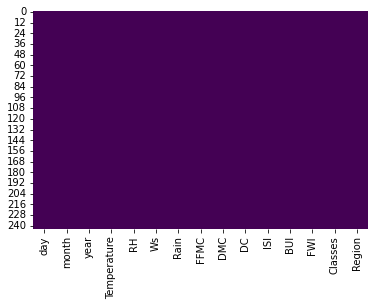

In [18]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [19]:
# Fetching the indexes of the null values
null_val_indexes = [i for i, row in df.iterrows() if row.isnull().any()]

In [20]:
null_val_indexes

[]

In [21]:
df.iloc[165]

day               14
month             07
year            2012
Temperature       37
RH                37
Ws                18
Rain             0.2
FFMC            88.9
DMC             12.9
DC             14.69
ISI             12.5
BUI             10.4
FWI             fire
Classes          nan
Region           1.0
Name: 165, dtype: object

We can observe that in 165 row for Classes column value is Nan. SO we will treat it by filling it with the value next to it.

We can also observe that value of FWI for 165 row is also object although it should be int64, so we will fix that.

In [22]:
df.loc[165, 'Classes'] = 'fire'

In [23]:
df.loc[165, 'FWI'] = 0.1

Lets quickly verify the changes

In [24]:
df.iloc[165]

day               14
month             07
year            2012
Temperature       37
RH                37
Ws                18
Rain             0.2
FFMC            88.9
DMC             12.9
DC             14.69
ISI             12.5
BUI             10.4
FWI              0.1
Classes         fire
Region           1.0
Name: 165, dtype: object

### 3.5 Fixing the data types of columns

Current data types of the columns are

In [25]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

We will change the data types to our custom types as previously we converted all of them to the string.

In [26]:
custom_dtypes = {'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64','FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64'}

df = df.astype(custom_dtypes)

### 3.5 Removing the Null values

In [27]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Their are no null values.

## 4. Detection and Removal of Outliers

### 4.1 Detecting outliers by Box plot

In [28]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']
num_columns = num_columns[3:] # excluding day, month, year, region, classes column

In [29]:
num_columns

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

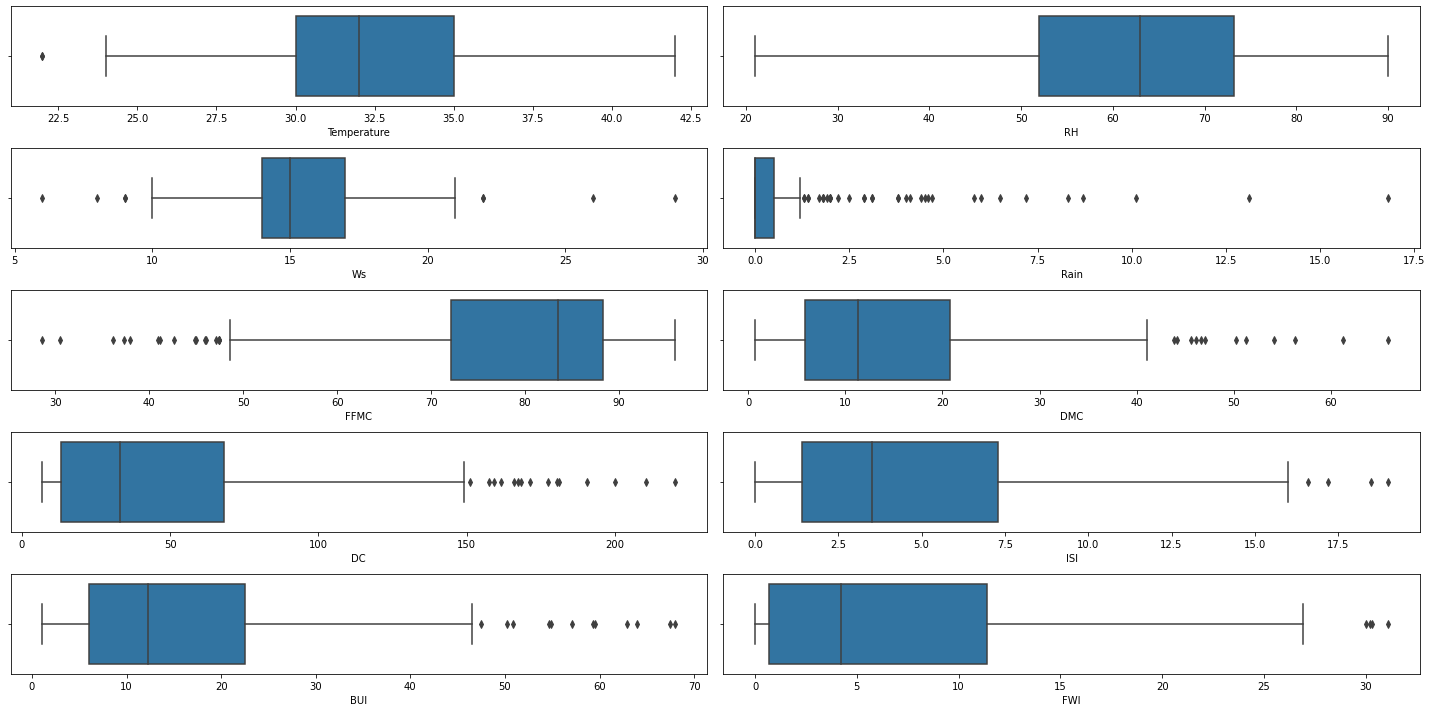

In [30]:
n = 1
plt.figure(figsize=(20, 10))
for column in num_columns:
    plt.subplot(5, 2, n)
    n+= 1
    sns.boxplot(df[column])
    plt.tight_layout()

### 4.2 Detecting outliers by z- score

In [31]:
z_scores = []
for column in num_columns:
    z_scores.append(np.abs(stats.zscore(df[column])))

In [32]:
z_scores

[0      0.874735
 1      0.874735
 2      1.702005
 3      1.977761
 4      1.426248
          ...   
 239    0.598979
 240    1.150492
 241    1.426248
 242    2.253517
 243    2.253517
 Name: Temperature, Length: 244, dtype: float64,
 0      0.332478
 1      0.063185
 2      1.350607
 3      1.821872
 4      1.013990
          ...   
 239    0.206109
 240    1.687225
 241    1.687225
 242    0.534449
 243    0.138786
 Name: RH, Length: 244, dtype: float64,
 0      0.889990
 1      0.892913
 2      2.316313
 3      0.892913
 4      0.176829
          ...   
 239    0.536333
 240    0.179752
 241    4.812379
 242    0.889990
 243    0.179752
 Name: Ws, Length: 244, dtype: float64,
 0      0.381223
 1      0.270307
 2      6.184192
 3      0.871719
 4      0.381223
          ...   
 239    0.381223
 240    1.823955
 241    0.130635
 242    0.331105
 243    0.280988
 Name: Rain, Length: 244, dtype: float64,
 0      0.851801
 1      0.942658
 2      2.151758
 3      3.444727
 4      0.914

Lets set the threshold to 3 and identify the outliers.

In [33]:
threshold = 3 
for z in z_scores:
    print(np.where(z > threshold))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([105, 237, 241], dtype=int64),)
(array([  2,  91,  92,  93, 105, 139], dtype=int64),)
(array([ 3, 93], dtype=int64),)
(array([ 89, 207, 208, 209], dtype=int64),)
(array([87, 88, 89], dtype=int64),)
(array([172, 187], dtype=int64),)
(array([ 87,  88,  89, 207, 208, 209], dtype=int64),)
(array([ 89, 172, 207, 208], dtype=int64),)


**Observation:** 

Here we can observe the row numbers where value of z-score is greater than threshold for respective numerical features.

Now we will calculate the IQR for each of numerical features.

In [34]:
feature_IQRs = []

for column in num_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    feature_IQRs.append(IQR)

In [35]:
for column, IQR in zip(num_columns, feature_IQRs):
    print(column + '------------->' + str(IQR))

Temperature------------->5.0
RH------------->21.25
Ws------------->3.0
Rain------------->0.5
FFMC------------->16.224999999999994
DMC------------->14.95
DC------------->54.87500000000001
ISI------------->5.9
BUI------------->16.525
FWI------------->10.675


We can also calculate lower_fence and upper_fence using the IQR to remove the outliers in later stage.

lower_fence = Q1 - 1.5 * IQR

higher_fence = Q3 + 1.5 * IQR

## 4. Feature segregation and Information

Checking columns and their data type

In [36]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

Categorical features in our dataset are

In [37]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [38]:
cat_features

['Classes', 'Region']

Numerical features in our dataset are

In [39]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [40]:
print('Categorical features:', cat_features)
print('Numerical Features:', num_features)

Categorical features: ['Classes', 'Region']
Numerical Features: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


Lets have num_feature and cat_feature data frame separately for further analysis.

In [41]:
num_df = df.filter(num_features[3:])  # without day, month, year

In [42]:
cat_df = df.filter(cat_features)

In [43]:
cat_features

['Classes', 'Region']

## 5. Bivariate Analysis

### 5.1 Correlation of numerical features

<AxesSubplot:>

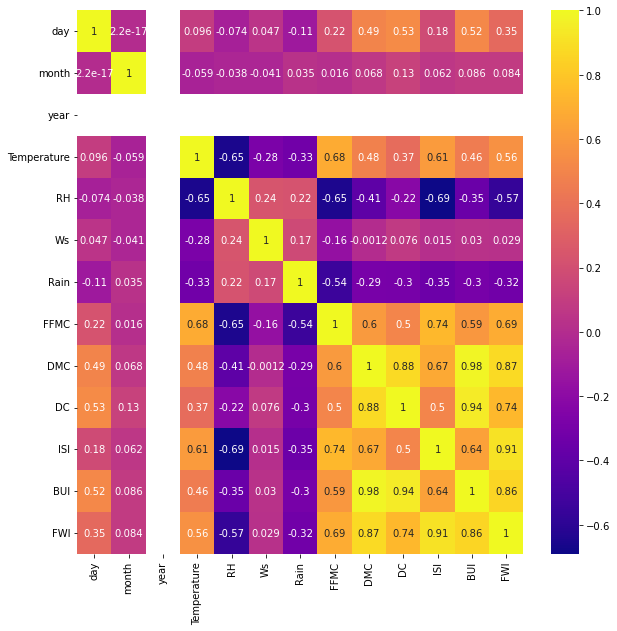

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='plasma')

**Observation:** 

We can observe that day, month and year are very obsolete here. So lets check covariance only for the rest of features.

<AxesSubplot:>

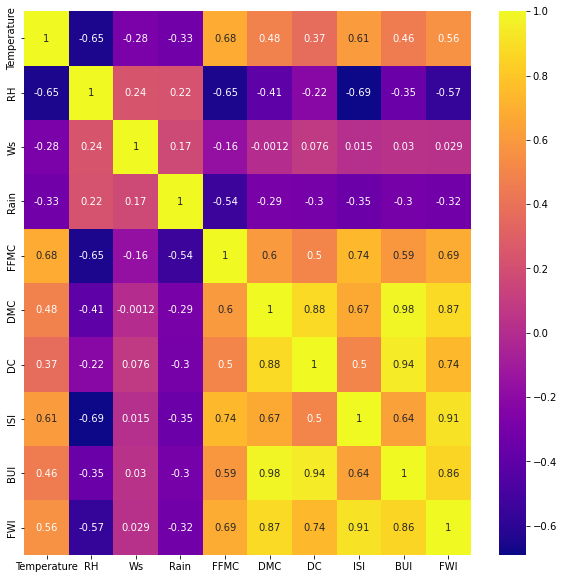

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(num_df.corr(), cbar=True, annot=True, cmap='plasma')

**Observation:** 

We can observe that:

- Their is very high positive correlation between
    - DMC and BUI 
    - DC and BUI
    - ISI and FWI
- Their is moderate positive correlation between
    - FFMC and ISI
    - FFMC and DMC
    - FFMC and FWI
    - DMC and ISI
    - DMC and DC
    - DMC and FWI
    - DC and FWI
    - ISI and FWI
    - Temperature and FFMC   
- Their is highly negative correlation between
    - Temperature and RH
    - RH and FFMC
    - RH and BUI
    - RH and FWI
    - RH and ISI
    - Rain and FFMC

### 5.2 Relation between categorical features

In [46]:
cat_df

,Classes,Region
0,notfire,0.0
1,notfire,0.0
2,notfire,0.0
3,notfire,0.0
4,notfire,0.0
...,...,...
239,fire,1.0
240,notfire,1.0
241,notfire,1.0
242,notfire,1.0


In [47]:
type(cat_df)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='count', ylabel='Classes'>

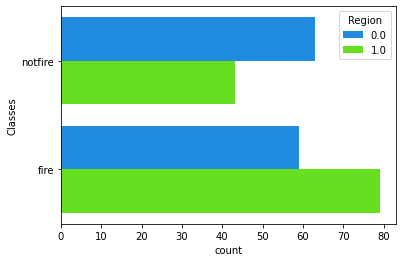

In [48]:
sns.countplot(data=cat_df, y='Classes', hue='Region', palette='gist_rainbow_r')

**Observation:** 

Region encoded with 0.0 represented by Blue is Bejaia Region and the one encoded as 1.0 and colour green is Sidi Bel-abbes region.

We can observe that their are more cases of fire in Sidi Bel-abbes region as compare to Bejaia region.

## 6. Univariate Analysis

Lets check the distribution of numerical features.

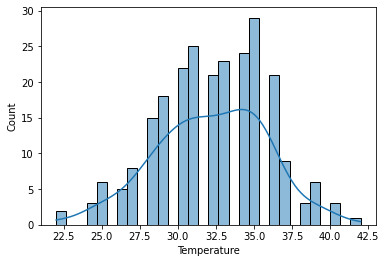

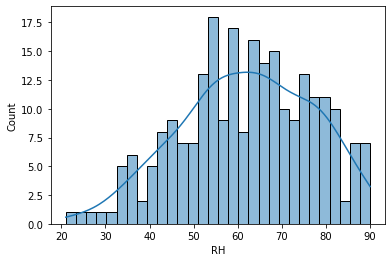

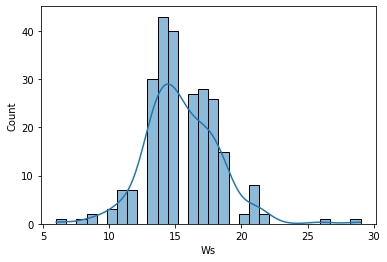

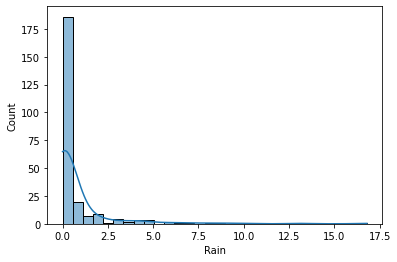

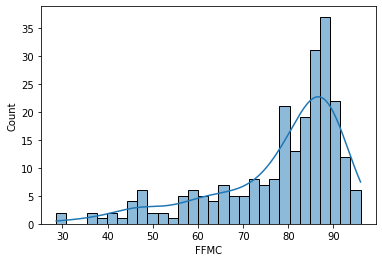

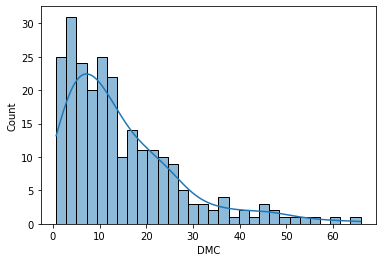

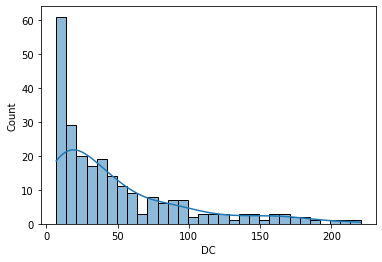

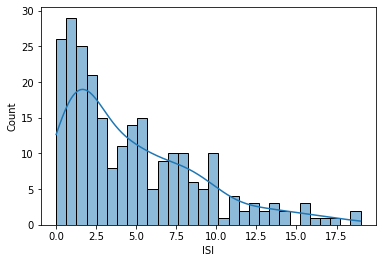

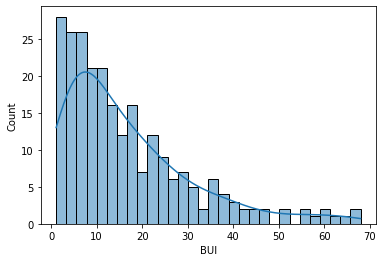

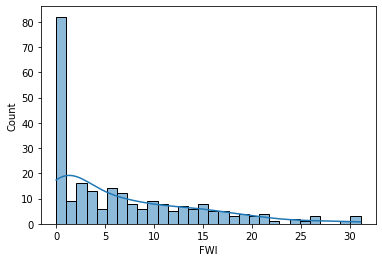

In [49]:
for column in num_columns:
    sns.histplot(data=num_df, x=column, kde=True, bins=30)
    plt.show()

**Observation:** 

We can observe that
- Rain, DMC, DC, ISI, BUI, FWI following right skewed Log-normal distribution.
- FFMC is following left skewed Log-normal distribution.
- Temperature, RH and WS are following Gaussian Distribution.

## 7. Analytical Observations

### 7.1 Wheat was the Highest Temperature and when it was ? 

Day of highest temperature.

<AxesSubplot:xlabel='Temperature', ylabel='day'>

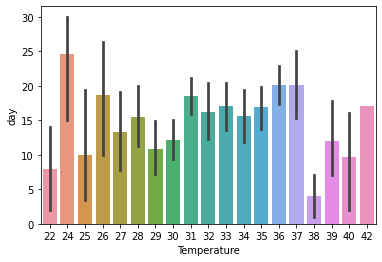

In [50]:
sns.barplot(x='Temperature', y='day', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='day'>

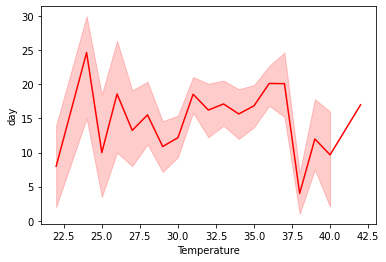

In [51]:
sns.lineplot(x='Temperature', y='day', data=df, color='Red')

Month of the highest temperature.

<AxesSubplot:xlabel='Temperature', ylabel='month'>

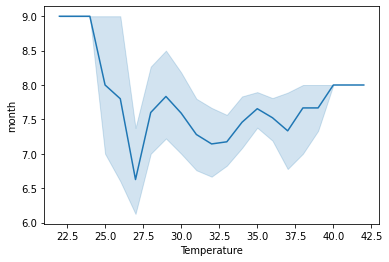

In [52]:
sns.lineplot(x='Temperature', y='month', data=df)

Year of highest temperature.

<AxesSubplot:xlabel='Temperature', ylabel='year'>

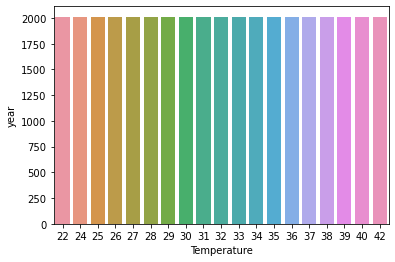

In [53]:
sns.barplot(x='Temperature', y='year', data=df)

In [83]:
df.sort_values(by='Temperature', ascending=False)[['Temperature', 'day', 'month', 'year']].head(1)

,Temperature,day,month,year
199,42,17,8,2012


**Observation:** It can be observed that on 17/8/2012 the temperature was maximum which was 42 degree celsius.

### 7.2 What was the Lowest Temperature and when it was ? 

In [82]:
df.sort_values(by='Temperature', ascending=True)[['Temperature', 'day', 'month', 'year']].head(1)

,Temperature,day,month,year
105,22,14,9,2012


**Observation:** It can be observed that on 14/9/2012 the temperature was minimum which was 22 degree celsius.

### 7.3 When did it rain the most?

Year with most rain

<AxesSubplot:xlabel='year', ylabel='Rain'>

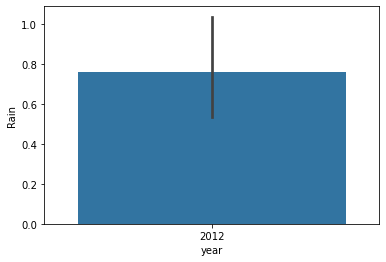

In [74]:
sns.barplot(y='Rain', x='year', data=df)

Month with most rain

<AxesSubplot:xlabel='month', ylabel='Rain'>

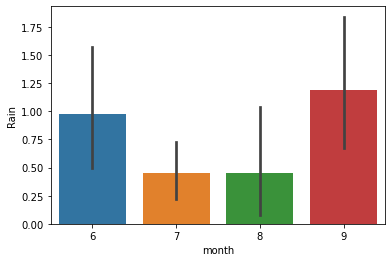

In [64]:
sns.barplot(y='Rain', x='month', data=df)

Day with most rain

<AxesSubplot:xlabel='day', ylabel='Rain'>

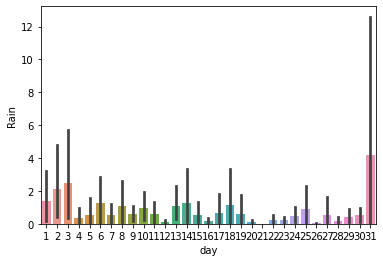

In [66]:
sns.barplot(y='Rain', x='day', data=df)

Highest rainy day

In [65]:
df.sort_values(by='Rain', ascending=False)[['Rain', 'day','month', 'year']].head(1)

,Rain,day,month,year
91,16.8,31,8,2012


**Observation:** It can be observed that on the 31/08/2012 it rained the most.

Most rainy year: 2012

Most rainy month: 9

Most rainy day: 31

Most rained: 16.8

### 7.4 When did it rain the least?

In [76]:
df.sort_values(by='Rain', ascending=True)[['Rain', 'day', 'month', 'year']].head(1)

,Rain,day,month,year
0,0.0,1,6,2012


**Observation:** It can be observed that on the 1/06/2012 it rained the most.

Least rained: 0.0

### 7.5 How many cases of fire ?

In [90]:
df.value_counts('Classes')

Classes
fire       138
notfire    106
dtype: int64

**Observation:** In total their are 138 case of fire and 106 cases of not fire.

### 7.6 Which region has more cases of fire ?

<AxesSubplot:xlabel='count', ylabel='Classes'>

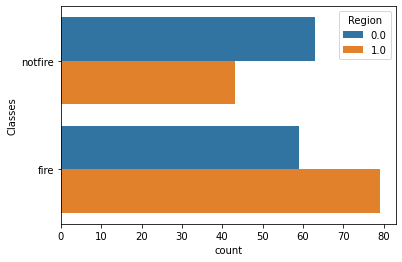

In [112]:
sns.countplot(data=cat_df, y='Classes', hue='Region')

**Observation:**  We can observe that their are more cases of fire in Sidi Bel-abbes region as compare to Bejaia region.

### 7.7 What is relation between fire and relative humidity(RH)?

<AxesSubplot:xlabel='RH', ylabel='Classes'>

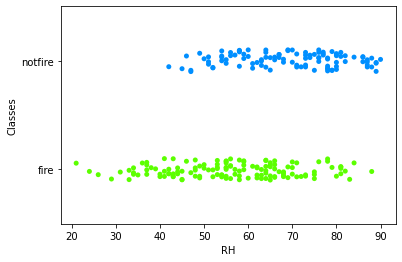

In [117]:
sns.stripplot(data=df, x='RH', y='Classes', palette='gist_rainbow_r')

**Observation:** More cases of fire when RH is in range of 40 to 70.

### 7.8 What is relation between fire and wind speed(Ws)?

<AxesSubplot:xlabel='Ws', ylabel='Classes'>

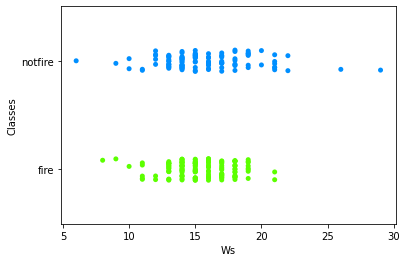

In [118]:
sns.stripplot(data=df, x='Ws', y='Classes', palette='gist_rainbow_r')

**Observation:** More cases of fire when Wind speed is in range of 10 to 20.

### 7.9 What is relation between fire and rain(Rain)?

<AxesSubplot:xlabel='Rain', ylabel='Classes'>

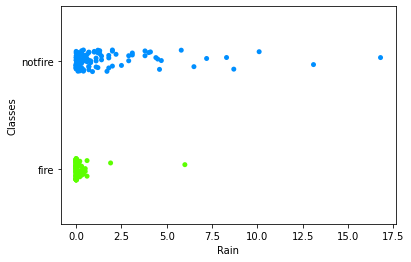

In [119]:
sns.stripplot(data=df, x='Rain', y='Classes', palette='gist_rainbow_r')

**Observation:** More cases of fire when their is less rain.

### 7.10 What is relation between fire and Fire weather Index (FWI)?

<AxesSubplot:xlabel='FWI', ylabel='Classes'>

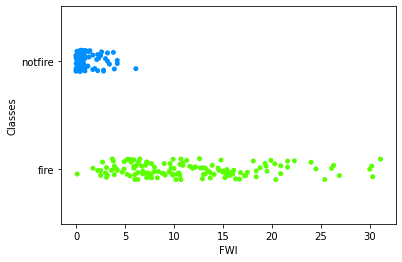

In [120]:
sns.stripplot(data=df, x='FWI', y='Classes', palette='gist_rainbow_r')

**Observation:** More cases of fire when FWI is below 20.

### 7.11 What is relation between fire and build up index(BUI)?

<AxesSubplot:xlabel='BUI', ylabel='Classes'>

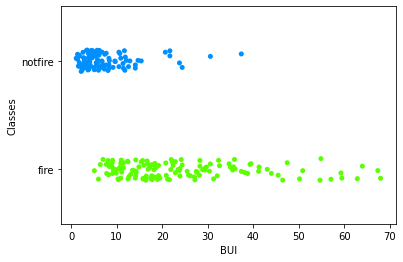

In [121]:
sns.stripplot(data=df, x='BUI', y='Classes', palette='gist_rainbow_r')

### 7.12 What is relation between fire and temperature(Temperature)?

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

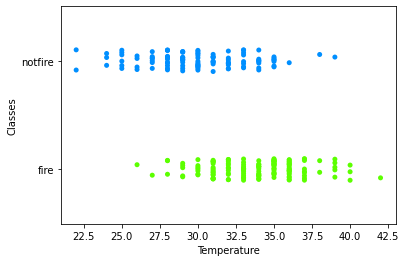

In [122]:
sns.stripplot(data=df, x='Temperature', y='Classes', palette='gist_rainbow_r')

**Observation:** More cases of fire when Temperature is in range of 30 to 40.

### 7.13 What is relation between fire and initial spread index(ISI)?

<AxesSubplot:xlabel='ISI', ylabel='Classes'>

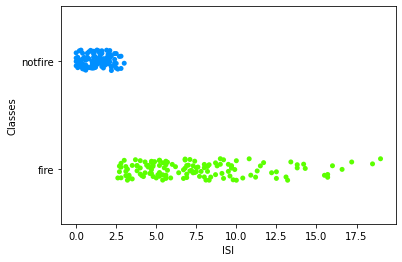

In [123]:
sns.stripplot(data=df, x='ISI', y='Classes', palette='gist_rainbow_r')

**Observation:** More cases of fire when initial spread index is in range of 2.5 to 10.

### 7.14 What is relation between fire and draught Code(DC)?

<AxesSubplot:xlabel='DC', ylabel='Classes'>

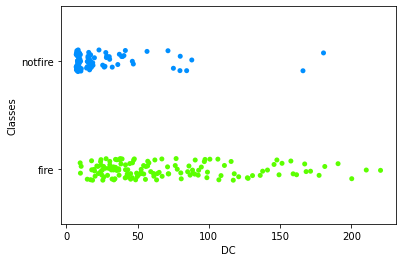

In [124]:
sns.stripplot(data=df, x='DC', y='Classes', palette='gist_rainbow_r')

**Observation:** Less frequent fire cases when DC is more than 100.

### 7.15 Which day and month has most number of fire cases?

<AxesSubplot:xlabel='day', ylabel='count'>

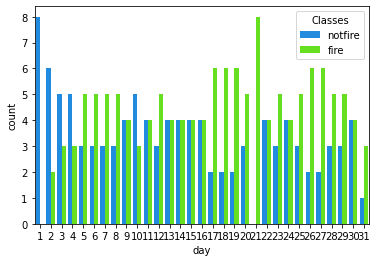

In [125]:
sns.countplot(data=df, x='day', hue='Classes', palette='gist_rainbow_r')

<AxesSubplot:xlabel='month', ylabel='count'>

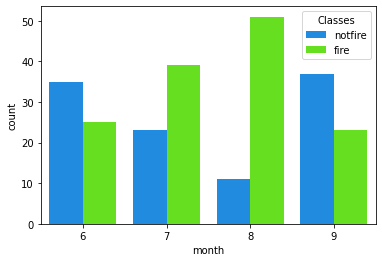

In [127]:
sns.countplot(data=df, x='month', hue='Classes', palette='gist_rainbow_r')

**Observation:** 
- 21 day of month has most number of fire cases.
- 2nd day of month has leas number of fire cases.
- August has most fire cases.
- July and September has less fire cases compare to fire cases.